# Visualize atomic structure

**Uppasd_tools** contains number of functions from visualization of atomic structure and magnetic configurations using _py3Dmol_.

In [11]:
from pathlib import Path
from uppasd_tools import UppOut

from IPython.display import Image, display

For visualization use [FeCo example](../data/FeCo/).  

First, we create an UppOut object. For more detial follow [example on reading output files](./read_output_files.ipynb).

In [2]:
# Path to the folder with UPPASD output files
path_FeCo = Path('../data/FeCo/')

# Create UppOut object
uppout = UppOut(path_FeCo)

# Print summary of the simulation output
print(uppout.summary())

Output directory: ../data/FeCo
Simulation ID: FeCo__B2
Available output files: ['averages', 'coord', 'cumulants', 'mcinitial', 'projavgs', 'projcumulants', 'restart', 'struct', 'totenergy']
---
Number of atoms in the unit cell: 2
Number of atom types: 2
Total number of atoms in the supercell: 432
Number of ensembles in the simulation: 1
xrange: (0.0, 5.5)
yrange: (0.0, 5.5)
zrange: (0.0, 5.5)


## Visualize atomic structure

To launch 3D interactive visualization of atomic structure use the function `visualize_supercell()`. 

Visualization uses data read from `coord.simid.out`.

In [ ]:
from uppasd_tools.visualize import visualize_supercell

# Visualize the supercell structure
view = visualize_supercell(
    uppout,
    type_to_symbol={1: "Fe", 2: "Co"},
    symbol_to_color={"Fe": "red", "Co": "blue"},
    symbol_to_scale={"Fe": 0.06, "Co": 0.08},
    # xlim=(0,2), ylim=(0,2), zlim=(0, 2),
    scale=0.1, rotate=(30, 10, 45)
)
view.show() 

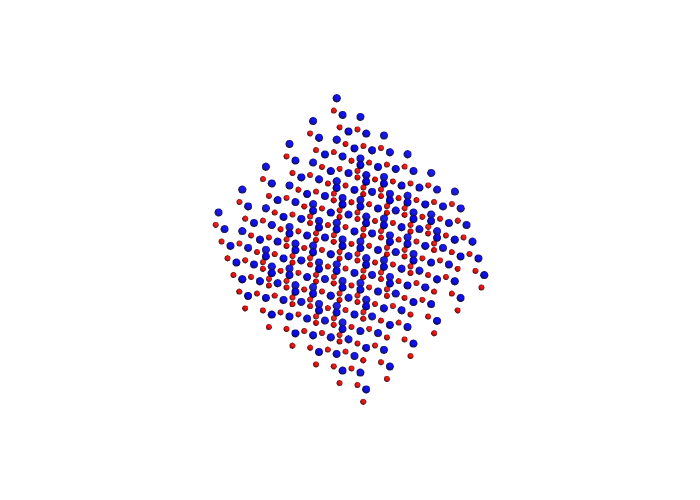

In [12]:
display(Image(filename="figures/supercell_visualization.png"))

If you want to save a png from the visualization (its initial view), use `view_to_png_async()` if you are using JupyterLab. In Python script `view_to_png()` should work.

In [4]:
from uppasd_tools.visualize import view_to_png_async

await view_to_png_async(view, Path("./figures/supercell_visualization.png"))

PosixPath('figures/supercell_visualization.png')

## Plot magnetic configurations

To launch 3D interactive visualization of magnetic configuration use `visualize_final_config()`.

This function plots one of the final configuration, which are saved in `restart.simid.out` file. 
The number of magnetic configurations corresponds to the number of simulated ensembles, which can be obtained from the UppOut metadata.

In [5]:
print(f"Number of final configurations: {uppout.num_ens:d}")

Number of final configurations: 1


In [ ]:
from uppasd_tools.visualize import visualize_final_config

# Visualize the final magnetic configuration
view = visualize_final_config(
    uppout=uppout, ens_index=0,
    type_to_symbol={1: "Fe", 2: "Co"},
    symbol_to_color={"Fe": "red", "Co": "blue"},
    symbol_to_scale={"Fe": 0.05, "Co": 0.05},
    # xlim=(0,5), ylim=(0,5), zlim=(0, 3),
    scale=0.1, mom_length=0.5, 
    rotate=(20, 45, 0)
)
view.show()

![Config](examples/figures/mag_config_visualization.png)

In [7]:
await view_to_png_async(view, Path("./figures/mag_config_visualization.png"))

PosixPath('figures/mag_config_visualization.png')

The final configurations can be read directly as a list of pandas DataFrames.

In [8]:
# Read final configurations
final_configs = uppout.final_configs()
print(f"Number of final configurations: {len(final_configs)}")

Number of final configurations: 1


In [9]:
final_configs[0].head()

,at_num,mom,mx,my,mz,x,y,z,at_type,at_num_cell
0,1,2.7207,0.322257,0.503825,0.801443,0.0,0.0,0.0,1,1
1,2,1.7202,0.324197,0.469592,0.821206,0.5,0.5,0.5,2,2
2,3,2.7207,0.297025,0.509625,0.807502,1.0,0.0,0.0,1,1
3,4,1.7202,0.148119,0.476423,0.866650,1.5,0.5,0.5,2,2
4,5,2.7207,0.378007,0.570611,0.729050,2.0,0.0,0.0,1,1
